Project Overview

The Titanic dataset is one of the most widely used datasets for learning machine learning concepts.
Your task is to design and prepare a dataset for predictive modelling of passenger survival, explicitly
linking every preprocessing choice to the statistical and distributional reasoning that underpins ML
generalization.

Dataset: **Titanic Kaggle Dataset**

Dataset Features
* Pclass – Passenger class (1, 2, 3)
* Name – Passenger’s name (contains titles useful for feature engineering)
* Sex – Male/Female
* Age – Age in years
* SibSp – Number of siblings/spouses aboard
* Parch – Number of parents/children aboard
* Ticket – Ticket identifier (may or may not be useful)
* Fare – Ticket fare
* Cabin – Cabin number (highly missing)
* Embarked – Port of embarkation (C, Q, S)
* Survived – Target variable (0 = No, 1 = Yes)




Core Learning Outcomes

By the end of this project, you should be able to:
1. Load datasets from CSV, JSON, and Excel formats using pandas.
2. Detect and handle missing values (Age, Cabin, Embarked).
3. Identify and treat outliers (e.g., Fare distribution).
4. Encode categorical data (Sex, Embarked, Title from Name) for ML algorithms.
5. Normalize and standardize numerical features (Age, Fare).
6. Engineer new features, e.g., FamilySize = SibSp + Parch + 1.
7. Perform feature selection using statistical tests (chi-square, correlation) and model-based
methods (feature importance).
8. Apply EDA techniques (histograms, boxplots, correlation heatmaps).

9. Discuss population vs. sample in context of Titanic data.
10. Identify sampling bias and selection bias, e.g., class imbalance in survival rates.


Project Tasks

1.Part A: Data Ingestion & Exploration
* Load the Titanic dataset from CSV, JSON, and Excel.
* Summarize using .info(), .describe(), and missingness heatmaps.
2.Part B: Handling Missing Values & Outliers
* Impute Age (median), Embarked (mode), flag missing values.
* Discuss whether Cabin should be dropped or engineered.
* Detect Fare outliers with IQR and Z-score; Winsorize or log-transform.
3.Part C: Feature Engineering & Encoding
* Extract Title from Name (Mr, Mrs, Miss, etc.).
* Create FamilySize, IsAlone, etc.
* Encode categorical variables using one-hot encoding.
4.Part D: Normalization & Feature Selection
* Apply MinMax scaling and standardization.
* Compare feature selection using correlation and model-based methods.
5.Part E: Documentation
* Write a decision_log.md explaining each preprocessing choice.
* Create a data_card.md describing features, preprocessing, and potential biases.
* Discuss how preprocessing decisions affect model generalization.

Resources
• Kaggle: Titanic Data Science Solutions
• Seaborn Tutorial: https://seaborn.pydata.org/tutorial.html
• Google Colab: https://colab.research.google.com

Deliverables
1. Cleaned dataset file (clean_titanic_v1.csv)

2. decision_log.md – Your reasoning for missing value handling, outlier treatment, encoding,
etc.
3. data_card.md – Dataset description, assumptions, and known biases.
4. Short bias note (~150 words) on representativeness of Titanic passengers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.to_csv('titanic.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000

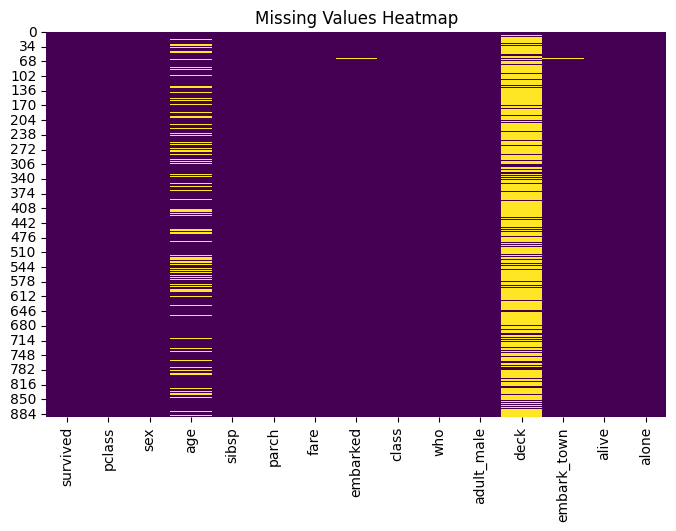

In [3]:
# Load dataset (CSV format, adjust path if needed)
df = pd.read_csv("titanic.csv")

# Info and basic stats
print(df.info())
print(df.describe())

# Missingness heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [21]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_zscore
0,0,3,male,22.0,1,0,2.110213,S,Third,man,True,Southampton,no,False,-0.879247
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False,1.360456
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,False,Southampton,yes,True,-0.798092
3,1,1,female,35.0,1,0,3.990834,S,First,woman,False,Southampton,yes,False,1.061442
4,0,3,male,35.0,0,0,2.202765,S,Third,man,True,Southampton,no,True,-0.783739
5,0,3,male,28.0,0,0,2.246893,Q,Third,man,True,Queenstown,no,True,-0.738202
6,0,1,male,54.0,0,0,3.967694,S,First,man,True,Southampton,no,True,1.037563
7,0,3,male,2.0,3,1,3.094446,S,Third,child,False,Southampton,no,False,0.136423
8,1,3,female,27.0,0,2,2.495954,S,Third,woman,False,Southampton,yes,False,-0.481186
9,1,2,female,14.0,1,0,3.436268,C,Second,child,False,Cherbourg,yes,False,0.489163


### PartB:

In [6]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
#age-->median(177)
#embarked-->mode(2)
df["Age_missing"] = df["Age"].isnull().astype(int)
df["age"].fillna(df["age"].median(), inplace=True)

df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

/tmp/ipython-input-1138244176.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-1138244176.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [11]:
#too many missing value so it's preferred to drop the column, moreover it is not relevent to the output
df.drop("deck", axis=1, inplace=True)
df.shape

(891, 14)

In [15]:
# IQR
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df["fare"] < lower_bound) | (df["fare"] > upper_bound)]
print("Number of Fare outliers (IQR):", outliers_iqr.shape[0])


# z-score
mean_fare = df["fare"].mean()
std_fare = df["fare"].std()

df["fare_zscore"] = (df["fare"] - mean_fare) / std_fare
outliers_z = df[np.abs(df["fare_zscore"]) > 3]   # threshold = 3
print("Number of Fare outliers (Z-score):", outliers_z.shape[0])

Number of Fare outliers (IQR): 116
Number of Fare outliers (Z-score): 20


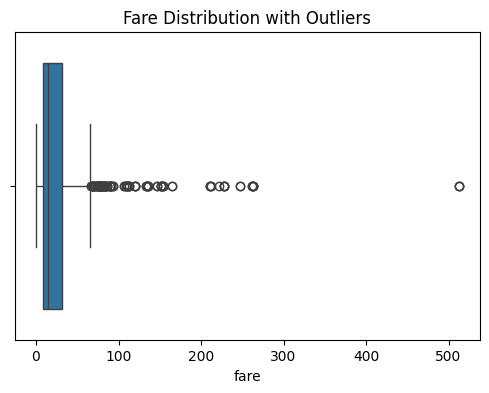

In [13]:
# 2. Outliers in Fare
# before the transformation
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fare"])
plt.title("Fare Distribution with Outliers")
plt.show()

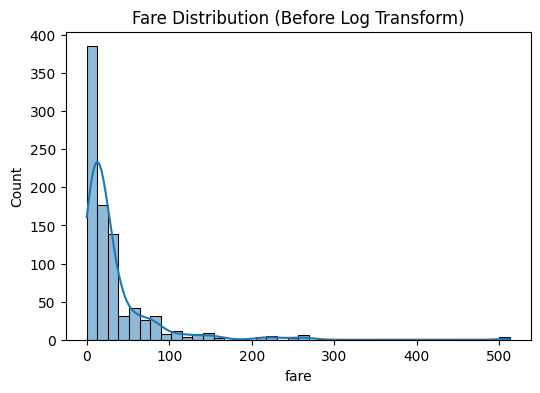

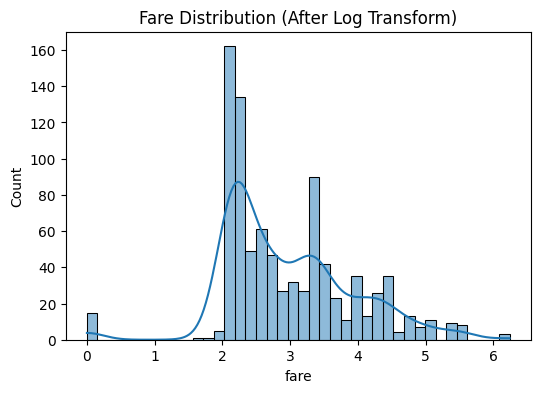

In [16]:
# Before transformation
plt.figure(figsize=(6,4))
sns.histplot(df["fare"], bins=40, kde=True)
plt.title("Fare Distribution (Before Log Transform)")
plt.show()

# Apply log transform
df["fare"] = np.log(df["fare"] + 1)

# After transformation
plt.figure(figsize=(6,4))
sns.histplot(df["fare"], bins=40, kde=True)
plt.title("Fare Distribution (After Log Transform)")
plt.show()

In [19]:
# after transformation
print(df['fare'].describe())
# IQR
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df["fare"] < lower_bound) | (df["fare"] > upper_bound)]
print("Number of Fare outliers (IQR):", outliers_iqr.shape[0])


# z-score
mean_fare = df["fare"].mean()
std_fare = df["fare"].std()

df["fare_zscore"] = (df["fare"] - mean_fare) / std_fare
outliers_z = df[np.abs(df["fare_zscore"]) > 3]   # threshold = 3
print("Number of Fare outliers (Z-score):", outliers_z.shape[0])

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: fare, dtype: float64
Number of Fare outliers (IQR): 31
Number of Fare outliers (Z-score): 18


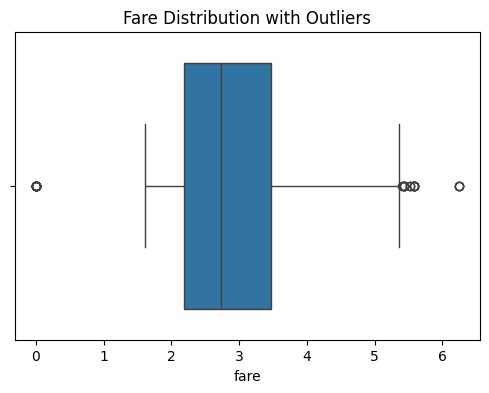

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fare"])
plt.title("Fare Distribution with Outliers")
plt.show()

### PartC:

In [25]:
df["familySize"] = df["sibsp"] + df["parch"] + 1

In [26]:
df.drop(['sibsp','parch'],axis = 1, inplace=True)
df.drop('alive',inplace=True,axis=1)
df.drop('embarked',inplace=True, axis=1)
df.drop('fare_zscore',inplace=True,axis=1)

In [46]:
df.head()

,survived,pclass,age,fare,adult_male,alone,familySize,sex_male,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman,class_Second,class_Third
0,0,3,0.271174,0.338125,1,0,0.1,True,False,True,True,False,False,True
1,1,1,0.472229,0.685892,0,0,0.1,False,False,False,False,True,False,False
2,1,3,0.321438,0.350727,0,1,0.0,False,False,True,False,True,False,True
3,1,1,0.434531,0.639463,0,0,0.1,False,False,True,False,True,False,False
4,0,3,0.434531,0.352955,1,1,0.0,True,False,True,True,False,False,True


In [35]:
df['adult_male'] = df['adult_male'].apply(lambda x: int(x))
df['alone'] = df['alone'].apply(lambda x: int(x))

In [40]:
df = pd.get_dummies(df, columns=["sex","embark_town","who",'class'], drop_first=True)

In [43]:
print(df.head())
print(df.shape)

   survived  pclass   age  ...  who_woman  class_Second  class_Third
0         0       3  22.0  ...      False         False         True
1         1       1  38.0  ...       True         False        False
2         1       3  26.0  ...       True         False         True
3         1       1  35.0  ...       True         False        False
4         0       3  35.0  ...      False         False         True

[5 rows x 15 columns]
(891, 15)


### PartD:

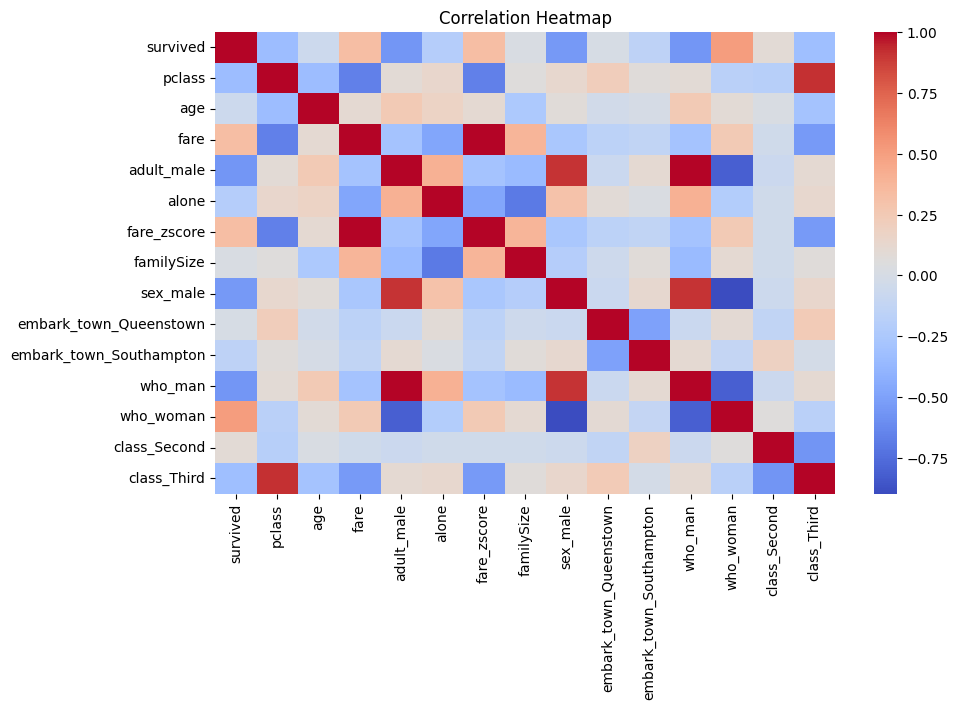

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns
num_cols = ["age","fare","familySize"]

# MinMax scaling
scaler_minmax = MinMaxScaler()
df[num_cols] = scaler_minmax.fit_transform(df[num_cols])

# Standardization (as separate example)
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

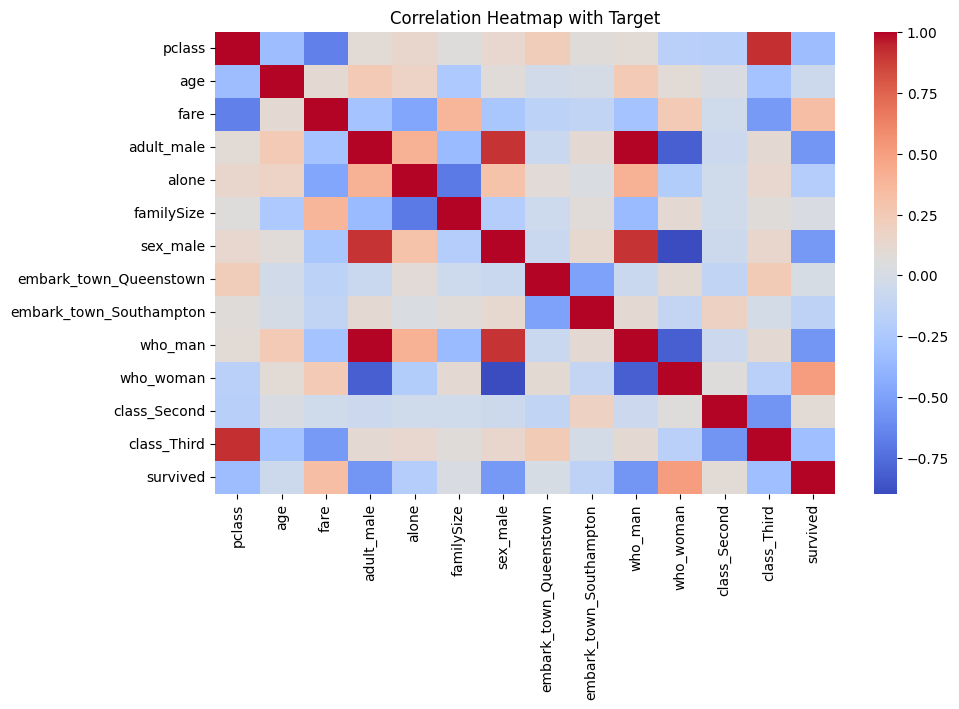

In [47]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assume 'Survived' is target variable
target = "survived"
features = [col for col in df.columns if col != target]

# --------------------------------
# 1. Correlation-Based Method
# --------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df[features+[target]].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap with Target")
plt.show()

In [48]:
corr_scores = df[features].corrwith(df[target]).abs().sort_values(ascending=False)
print("Correlation with Survival:\n", corr_scores)

Correlation with Survival:
 adult_male                 0.557080
who_man                    0.557080
sex_male                   0.543351
who_woman                  0.506562
pclass                     0.338481
fare                       0.329862
class_Third                0.322308
alone                      0.203367
embark_town_Southampton    0.149683
class_Second               0.093349
age                        0.064910
familySize                 0.016639
embark_town_Queenstown     0.003650
dtype: float64



Random Forest Feature Importance:
 fare                       0.246073
age                        0.225065
sex_male                   0.102288
adult_male                 0.101126
who_man                    0.082360
familySize                 0.065538
pclass                     0.049627
class_Third                0.039640
who_woman                  0.038023
embark_town_Southampton    0.020356
class_Second               0.010878
alone                      0.009625
embark_town_Queenstown     0.009401
dtype: float64


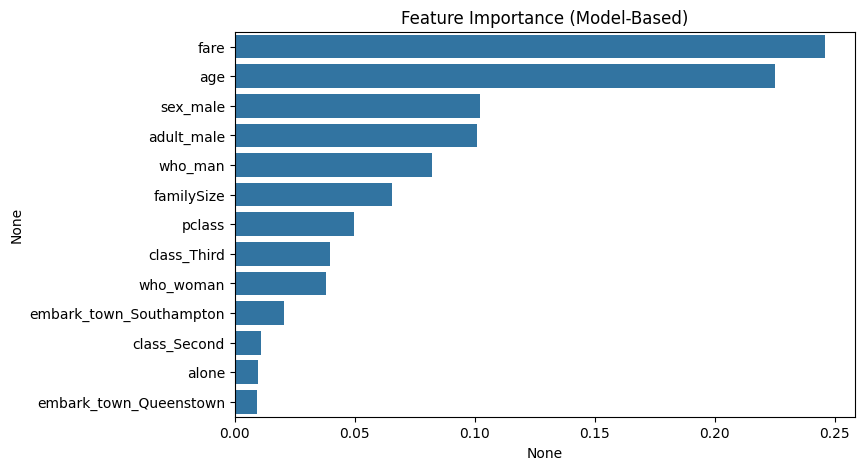


Top features by correlation: ['adult_male', 'who_man', 'sex_male', 'who_woman', 'pclass']
Top features by RandomForest: ['fare', 'age', 'sex_male', 'adult_male', 'who_man']


In [49]:
X = df[features]
y = df[target]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importances from model
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", importances)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Model-Based)")
plt.show()

# --------------------------------
# Compare Results
# --------------------------------
print("\nTop features by correlation:", list(corr_scores.head(5).index))
print("Top features by RandomForest:", list(importances.head(5).index))

### PartE:

In [50]:
df.to_csv("clean_titanic_v1.csv", index=False)
print("✅ Cleaned dataset saved as clean_titanic_v1.csv")

✅ Cleaned dataset saved as clean_titanic_v1.csv


In [51]:
df_std.to_csv("clean_titanic_std_v1.csv", index=False)
print("✅ Cleaned dataset saved as clean_titanic_v1.csv")

✅ Cleaned dataset saved as clean_titanic_v1.csv


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   fare                     891 non-null    float64
 4   adult_male               891 non-null    int64  
 5   alone                    891 non-null    int64  
 6   familySize               891 non-null    float64
 7   sex_male                 891 non-null    bool   
 8   embark_town_Queenstown   891 non-null    bool   
 9   embark_town_Southampton  891 non-null    bool   
 10  who_man                  891 non-null    bool   
 11  who_woman                891 non-null    bool   
 12  class_Second             891 non-null    bool   
 13  class_Third              891 non-null    bool   
dtypes: bool(7), float64(3), in